In [9]:
pip install tensorflow-gpu==1.14.0

In [10]:
pip install keras==2.0.2

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# カレントディレクトリの変更
import os
os.chdir('/content/drive/My Drive/Sprint19/')

# カレントディレクトリの取得
print(os.getcwd())

/content/drive/My Drive/Sprint19


In [7]:
!git clone https://github.com/zhixuhao/unet

fatal: destination path 'unet' already exists and is not an empty directory.


### 【問題1】学習・推定

以下のKeras実装を使用して学習・推定を行ってください。

In [9]:
# カレントディレクトリの変更
import os
os.chdir('/content/drive/My Drive/Sprint19/unet/')

# カレントディレクトリの取得
print(os.getcwd())

/content/drive/My Drive/Sprint19/unet


In [10]:
import tensorflow as tf
import keras

In [11]:
tf.__version__,keras.__version__

'1.14.0'

In [14]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [8]:
!nvidia-smi

Tue Sep 29 04:52:45 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    25W / 300W |      0MiB / 16130MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

- unetの階層にあるtrainUnet.ipynbファイルのコードを以下にコピーして実行する。

In [15]:
from model import *
from data import *

## Train your Unet with membrane data

membrane data is in folder membrane/, it is a binary classification task.

The input shape of image and mask are the same :(batch_size,rows,cols,channel = 1)

### Train with data generator

In [92]:
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'data/membrane/train','image','label',
                        data_gen_args,save_to_dir = None)
model = unet()
model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=100,epochs=2,callbacks=[model_checkpoint])

/content/drive/My Drive/Sprint19/unet/model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


Epoch 1/2
Found 4000 images belonging to 1 classes.
Found 4000 images belonging to 1 classes.
100/100 [==============================] - 18s - loss: 0.6922 - acc: 0.7568    
Epoch 2/2
100/100 [==============================] - 7s - loss: 0.6903 - acc: 0.7535     


### test your model and save predicted results

In [95]:
testGene = testGenerator("data/membrane/test/", num_image=10)

model.load_weights("unet_membrane.hdf5")
results = model.predict_generator(testGene, steps = 5, verbose=1)
saveResult("data/membrane/test",results)

5/5 [==============================] - 0s     

/content/drive/My Drive/Sprint19/unet/data.py:124: UserWarning: data/membrane/test/0_predict.png is a low contrast image
  for i in range(num_class):
/content/drive/My Drive/Sprint19/unet/data.py:124: UserWarning: data/membrane/test/1_predict.png is a low contrast image
  for i in range(num_class):
/content/drive/My Drive/Sprint19/unet/data.py:124: UserWarning: data/membrane/test/2_predict.png is a low contrast image
  for i in range(num_class):
/content/drive/My Drive/Sprint19/unet/data.py:124: UserWarning: data/membrane/test/3_predict.png is a low contrast image
  for i in range(num_class):
/content/drive/My Drive/Sprint19/unet/data.py:124: UserWarning: data/membrane/test/4_predict.png is a low contrast image
  for i in range(num_class):


- 推測した画像の表示

In [97]:
import os
import glob

In [96]:
print(os.getcwd())

/content/drive/My Drive/Sprint19/unet


In [111]:
img_path ="./data/membrane/test/"

In [112]:
img_list = glob.glob(img_path + '/*' + "0*.png")
img_list

['./data/membrane/test/0.png', './data/membrane/test/0_predict.png']

- 学習が足りていないため、predict画像はグレーで表示される。

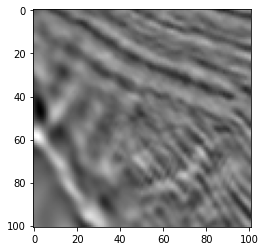

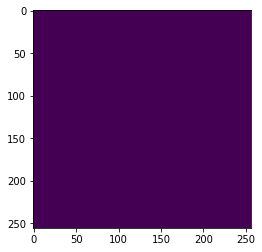

In [123]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

for i in img_list:
  img = Image.open(i)
  plt.imshow(img)
  plt.show()

### 【問題2】コードリーディング

論文[1]に目を通した上で、上記実装のコードリーディングを行ってください。

In [ ]:
"""
def unet(pretrained_weights = None,input_size = (256,256,1)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(input = inputs, output = conv10)

    model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    #model.summary()

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model
"""

- 2次元畳み込み層、最大プーリング層¶

conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs) 

conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1) 

pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) 

2次元畳み込みおよび最大プーリングをNo.1〜5まで実施している。

4層及び5層にてドロップアウトを実施している。




- アップサンプリング層(逆畳み込み層)

up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))

merge6 = concatenate([drop4,up6], axis = 3)

conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)

conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

No.６〜9では、Upsampling2Dでアップサンプリングを実施している。 
concatenateでNo.1〜5のダウンサンプリング時に保存した特徴量マップを結合して、
通常の畳み込みを実施している。



- No.10 シグモイド活性化関数¶

conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9) 

sigmoid関数で二値分類を実施している。


- モデル

model = Model(input = inputs, output = conv10) 

model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy']) 
 
モデルのインスタンスを生成して最適化手法及びロスの計算方法を指定する


- 総括

論文で紹介されているU-net architectureの図通りに処理されており、「U字のネットワーク」構造になっている事が確認できる。
